Introduction to Artificial Intelligence - TP2 - April 19th 2018 
--

At the end of this session, you will be able to : 
- Perform basic unsupervised learning tasks using sklearn
- Apply unsupervised learning on PyRat datasets 

In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,MiniBatchDictionaryLearning,DictionaryLearning

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)


# Digits dataset

For this TP we are going to be using the DIGITS dataset. The first thing we are going to do is load the dataset. 

As this is <b>unsupervised</b> we will mostly ignore y (it will only be used for visualization).

Load the model

In [2]:
x_digits,y_digits = load_digits(n_class=10,return_X_y=True)
print(x_digits.shape)

(1797, 64)


Visualize some examples

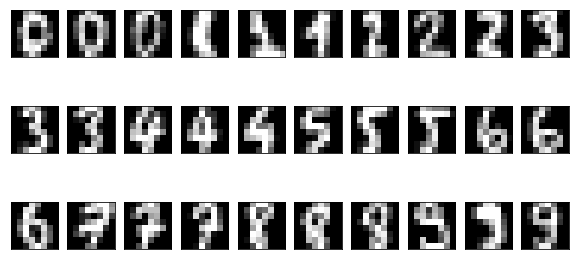

In [3]:
fig = plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(3,10,3*i+1)
    
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.subplot(3,10,3*i+2)
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,3*i+3)
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])    

Split the dataset

In [4]:
x_train = x_digits[:int(0.8*len(x_digits))]
y_train = y_digits[:int(0.8*len(x_digits))]
x_test = x_digits[int(0.8*len(x_digits)):]
y_test = y_digits[int(0.8*len(x_digits)):]
x_train.shape, x_test.shape, x_digits.shape

((1437, 64), (360, 64), (1797, 64))

# K-means
Using sklearn we are going to perform K-means clustering with $10$ clusters. As we did in the last TP we will instantiate an object of the class [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), with n_clusters=10 and random_state=0(so that you results are consistent with ours).

You then should fit the model to the training data (without passing the y as this is a nonsupervised model).

In [5]:
### CELL TO COMPLETE, create object kmeans from class KMeans
KMean_classifier = KMeans(n_clusters=10, random_state=0)
KMean_classifier.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Now we are going to visualize the centroids of the $10$ clusters. First we have to get the center of each cluster. 

This will be done by using the attribute cluster\_centers\_ from the object.

In [6]:
### CELL TO COMPLETE, put the cluster centers in variable centroids
centroids = KMean_classifier.cluster_centers_
print(centroids.shape)

(10, 64)


We will now plot the clusters

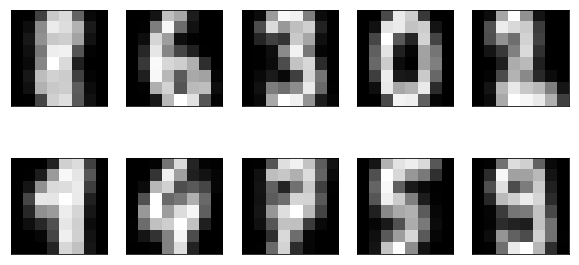

In [7]:
centroids = KMean_classifier.cluster_centers_
fig = plt.figure(figsize=(10,5))

for i,curcen in enumerate(centroids):
    
    plt.subplot(2,5,i+1)
    im_cen = curcen.reshape((8,8))
    plt.imshow(im_cen,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

We are now going to take a look in our reconstructions using our KMeans model.

First we take a sample from each class

In [8]:
### Pick a few random examples 
whichex = np.random.randint(low=0,high=100,size=1) 

X_samp = np.concatenate([x_digits[y_digits==i][whichex] for i in range(10)])

X_quant = KMean_classifier.transform(X_samp)

labels = np.argmin(X_quant,axis=1)
print(X_quant)
print(X_quant.shape)
print(labels)

[[39.76465772 35.69168027 43.86169109 24.0486867  45.55760918 40.01219454
  33.84197831 43.73891233 45.05394771 36.29539013]
 [37.63209732 49.7838356  44.23501819 53.17792568 50.86836295 20.90978133
  38.71256843 43.7397437  50.07146201 44.84757623]
 [30.1648854  39.87882518 40.86462272 48.7596879  22.68190308 50.55719302
  47.99586236 46.50325857 38.83092792 39.67979332]
 [50.0796131  57.40822467 28.61017983 43.52103619 49.10588199 45.77858031
  52.16667713 37.6132838  42.91828158 36.20424429]
 [34.61423353 39.89067439 53.18456492 53.35810701 49.50616749 40.8597143
  27.35964496 44.72130904 47.14975699 50.66377065]
 [40.41467984 48.07377478 44.77987086 48.52946077 40.84606664 52.56607203
  48.11235073 40.96386098 19.25230656 43.30142764]
 [39.51350099 16.9323436  48.68308115 38.41487952 39.6463566  51.03260785
  37.23418804 49.87665116 42.67898939 42.16006312]
 [39.15879767 49.20120989 51.01525535 56.79502616 43.44671882 51.76012797
  43.05610721 37.35020624 45.59033773 50.59240581]
 

In [9]:
### CELL TO COMPLETE use the transform method from the kmeans object and the argmin method from class numpy
### to generate an array containing the closest centroid to the samples 
### and another array to store the error of reconstructing the samples 

X_errors = X_quant
closest_centroids = centroids[labels]  #Array containing the closest centroid (argmin of error) to the samples
best_errors = [X_quant[i][labels[i]] for i in range(10)]  #Array containing the minimal error for each sample
print(best_errors)

[24.04868670003987, 20.909781334149056, 22.681903076530396, 28.610179832470408, 27.359644961576898, 19.252306562246208, 16.932343597713086, 37.350206242216224, 26.4005931151299, 22.848827374751693]


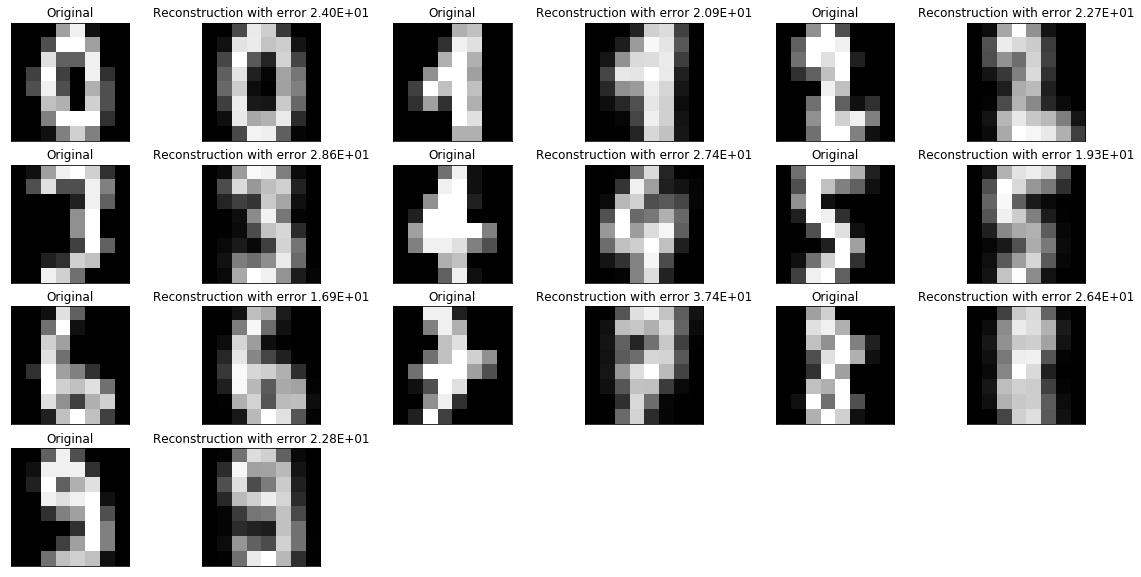

In [10]:
plt.figure(figsize=(20,10))
for i,(im,im_cen,error) in enumerate(zip(X_samp,closest_centroids,best_errors)):
        
    plt.subplot(4,6,1+2*i)
    plt.imshow(im.reshape(8,8),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Original")
    
    plt.subplot(4,6,2+2*i)
    plt.imshow(im_cen.reshape(8,8),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Reconstruction with error %.2E"%error)


Visualize the elbow method with inertia, by generating KMeans with clusters ranging from 1 to 99, using random state = 0. Inertia is stored in [inertia\_](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

100%|██████████| 99/99 [00:36<00:00,  1.74it/s]


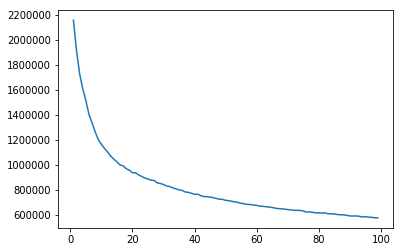

In [11]:
import tqdm
inertias = []
nclust = range(1,100)
### CELL TO COMPLETE, generate a KMeans model with varying n_clusters, fit it to the data 
### and add its inertia to the inertia list
for i in tqdm.tqdm(nclust):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(x_digits)
    inertias.append(kmean.inertia_)
    
plt.plot(nclust,inertias)





Sparse Dictionary Learning  on Digits
--

We are now going to pass to dictionary learning. The first thing is to generate a model using [MiniBatchDictionaryLearning](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html). MiniBatch here means that the method is trained using only a part of the dataset at each time, which helps immensely with the scaling of the method to bigger and wider datasets, but does not guarantee a performance as good as the normal method (where the method see all the dataset at the same time).

Use n_components=$16$, random_state=$0$ and verbose = $10$ to instantiate your object. 

The method [fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html#sklearn.decomposition.MiniBatchDictionaryLearning.fit_transform) is more useful than fit in this case, as it returns the code generated by the dictionary.

In [26]:
## CELL TO COMPLETE
dictlearn = MiniBatchDictionaryLearning(n_components=16, random_state=0, verbose = 10)#Instantiate a MiniBatchDictionaryLearning
code = dictlearn.fit_transform(x_digits) #Get the code from fit_transform => Get U from the course

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  10 (elapsed time:   0s,  0.0mn)
Iteration  20 (elapsed time:   0s,  0.0mn)
Iteration  30 (elapsed time:   0s,  0.0mn)
Iteration  40 (elapsed time:   0s,  0.0mn)
Iteration  50 (elapsed time:   0s,  0.0mn)
Iteration  60 (elapsed time:   0s,  0.0mn)
Iteration  70 (elapsed time:   0s,  0.0mn)
Iteration  80 (elapsed time:   0s,  0.0mn)
Iteration  90 (elapsed time:   0s,  0.0mn)
Iteration  100 (elapsed time:   0s,  0.0mn)
Iteration  110 (elapsed time:   0s,  0.0mn)
Iteration  120 (elapsed time:   0s,  0.0mn)
Iteration  130 (elapsed time:   0s,  0.0mn)
Iteration  140 (elapsed time:   0s,  0.0mn)
Iteration  150 (elapsed time:   0s,  0.0mn)
Iteration  160 (elapsed time:   0s,  0.0mn)
Iteration  170 (elapsed time:   1s,  0.0mn)
Iteration  180 (elapsed time:   1s,  0.0mn)
Iteration  190 (elapsed time:   1s,  0.0mn)
Iteration  200 (elapsed time:   1s,  0.0mn)
Iteration  210 (elapsed time:   1s,  0.0mn)
Iteration  220 (elapsed time:   1s,  0.0mn

We now retrieve each of the components of the dictionary, and plot them so we can visualize the results

In [27]:
print(code)
print(code.shape)

[[  0.           0.          -5.08622948 ... -24.14945103   0.
    0.        ]
 [ 31.02977819   0.           6.55731934 ...   0.           0.
    0.        ]
 [ 19.49849765   0.           8.38708713 ...   0.           0.
    0.        ]
 ...
 [ 28.28697615   0.           0.         ...   0.         -16.11327573
    0.        ]
 [  0.           0.           0.         ...   0.         -30.78351365
   -6.75421679]
 [  0.           0.           0.         ...   0.         -23.11794956
   12.69310135]]
(1797, 16)


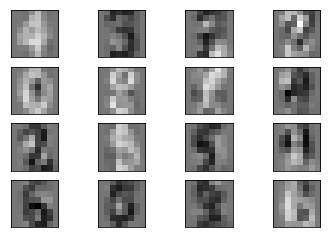

In [28]:
components = dictlearn.components_ # Get V from the course
fig,axis = plt.subplots(4,4)
for i,d in enumerate(components):
    ax = axis[i//4][i%4]
    ax.imshow(d.reshape((8,8)),cmap=plt.cm.gray,vmin=np.min(components),vmax=np.max(components))
    ax.set_xticks([])
    ax.set_yticks([])

Here we can see that the structure of the digits was kept by the components, which means that the digits are always centered and that the rest is a uniform background. 

Now we want to generate some reconstructions, so first we are going to generate some samples

In [30]:
whichex = np.random.randint(low=0,high=100,size=1) 
samples = list()
indexes = list()
for i in range(10):
    index = np.where(y_digits==i)[0][whichex]
    samples.append(x_digits[index])
    indexes.append(index)
X_samp = np.concatenate(samples) # samples = examples
indexes = np.array(indexes) # Indexes of the samples

[[386]
 [387]
 [388]
 [385]
 [400]
 [391]
 [402]
 [403]
 [404]
 [405]]
(16, 64)


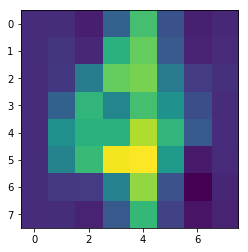

In [31]:
print(indexes)
print(components.shape)
plt.imshow(components[0].reshape((8,8)))

And now we will use the codes obtained using the dictionary and the indexes used to extract the samples to reconstruct the data by using [np.dot]() function to perform matrix multiplication between the sample code and the components from the dictionary.

In [32]:
### CELL TO COMPLETE, generate the reconstructions array using code, indexes and D
reconstructions = np.dot(code, components)

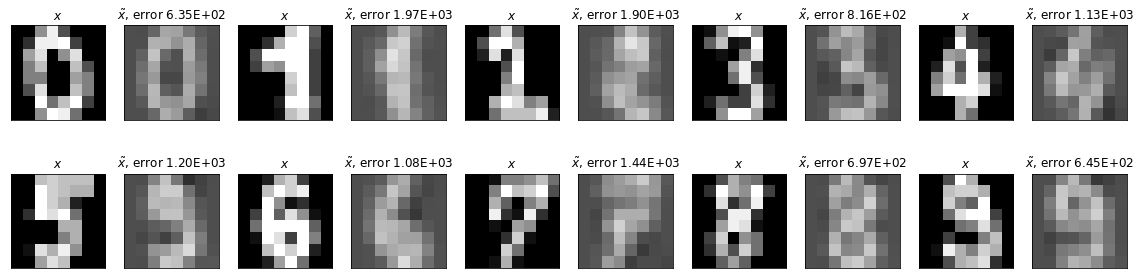

In [33]:
plt.figure(figsize=(20,5))
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    plt.subplot(2,10,plot_index*2+1)

    plt.imshow(digit.reshape((8,8)),cmap=plt.cm.gray,vmin=x_digits.min(),vmax=x_digits.max())
    plt.xticks([])
    plt.yticks([])
    plt.title('$x$')
        
    plt.subplot(2,10,plot_index*2+2)
    plt.imshow(reconstruction.reshape((8,8)),cmap=plt.cm.gray,vmin=reconstructions.min(),vmax=reconstructions.max())
    plt.xticks([])
    plt.yticks([])
    error = np.sum((reconstruction-digit)**2)
    plt.title('${\~x}$, error %.2E' % error)

# Visualization of manifold learning

One example of the importance of manifold learning, we train a TSNE model and plot the 2D visualization

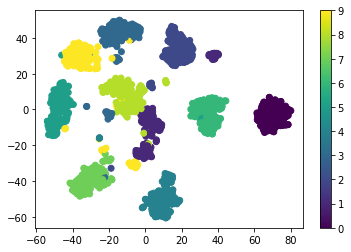

In [34]:
from sklearn.manifold import TSNE
unsup = TSNE(random_state = 0)
examples = unsup.fit_transform(x_digits)
plt.scatter(examples[:,0],examples[:,1],c=y_digits)
plt.colorbar()

Unsupervised learning on pyrat games
--

Now it is your turn. Perform the same analysis we did in the digits dataset on the pyrat dataset you generated for TP1. We are going to be concentrating ourselves only in the games that the python lost (i.e y < 1)

In [46]:
### CELL TO COMPLETE, load the dataset and stock only the games the python lost in x and y
filename = 'dataset.npz'
loaded_npz = np.load(filename)
y = loaded_npz["y"]
x = loaded_npz["x"][y<1]
y = y[y<1]
x.shape, y.shape

((546, 315), (546,))

Plot a few configurations of the pyrat dataset. In the first TP (TP0) we made a mistake of representing the labyrinth as (15,21) instead of (21,15). Another mistake we made was not inverting the yaxis, which made that not only our labyrinth was not in the correct aspect ratio it was also inverted. 

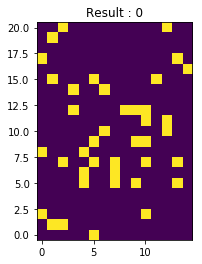

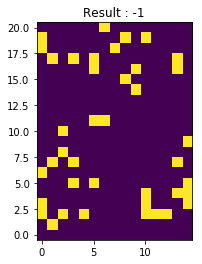

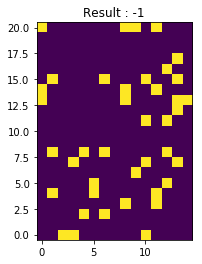

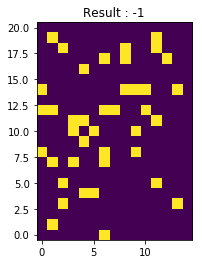

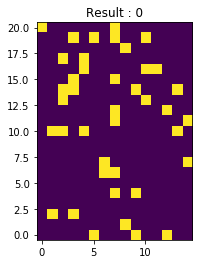

In [47]:
afew = 5
for i in range(afew):
    ind = np.random.randint(x.shape[0])
    plt.imshow(x[ind].reshape((21,15)))
    plt.title('Result : %d' % y[ind])
    plt.gca().invert_yaxis()
    plt.show()

# Mean representation of losses

Do the same experiment as of the end of TP0 by showing the mean representation of the games the python didn't win. This time use the correct values for the aspect ratio of the labyrinth and the correct orientation of the y_axis

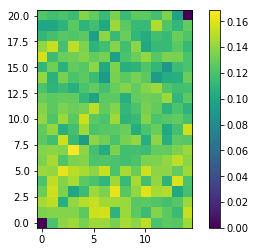

In [50]:
### CELL TO COMPLETE
mean_representation = np.mean(x,axis=0)
plt.imshow(mean_representation.reshape((21,15))) # Reshape the labyrinth
plt.gca().invert_yaxis() # Invert the axis to have the same representation as the game
plt.colorbar()

Now do a visualization of the cluster centroids and reconstructions as we did with digits. Finally try to find the best k by testing different values of n_clusters 

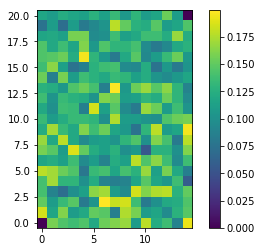

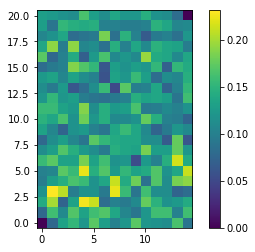

In [66]:
## Define the models and plot the clusters
KMean_classi = KMeans(n_clusters=2, random_state=0) # 2 : one for the rat win, an other for the draws
KMean_classi.fit(x)
centroid = KMean_classi.cluster_centers_
for clusters in centroid: # Plot the clusters
    plt.imshow(clusters.reshape((21, 15)))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()    

[[5.94467552 5.89881618]
 [5.87255765 6.01272775]]
(2, 2)
[1 0]
[5.898816177443662, 5.87255764675315]


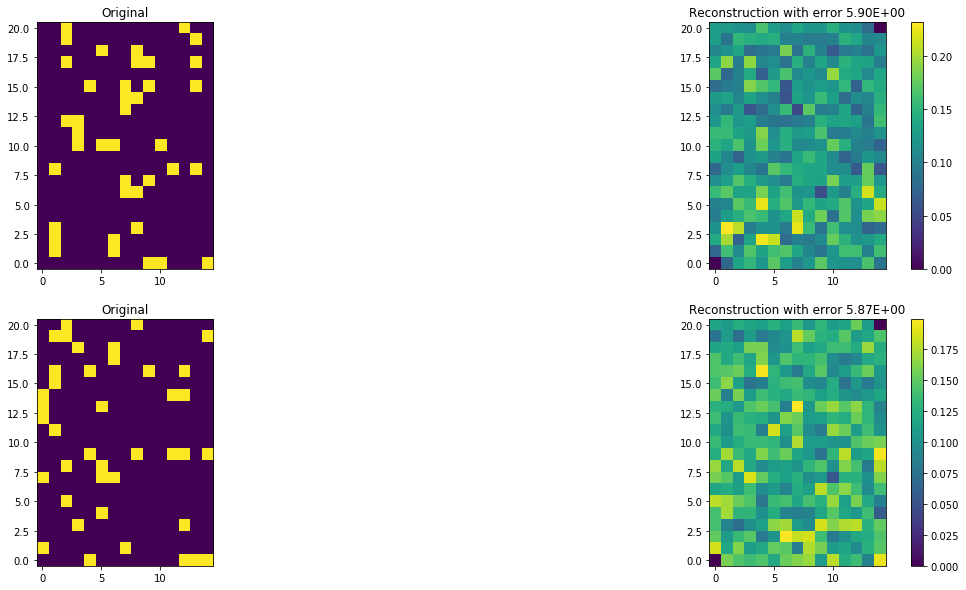

In [72]:
## Show some examples
whichex = np.random.randint(low=0,high=100,size=1) 
X_samp = np.concatenate([x[y==i][whichex] for i in [-1, 0]])
X_quant = KMean_classi.transform(X_samp)
labels = np.argmin(X_quant,axis=1)

print(X_quant)
print(X_quant.shape)
print(labels)

X_errors = X_quant
closest_centroids = centroid[labels]  #Array containing the closest centroid (argmin of error) to the samples
best_errors = [X_quant[i][labels[i]] for i in range(2)]  #Array containing the minimal error for each sample
print(best_errors)
plt.figure(figsize=(20,10))
for i,(im,im_cen,error) in enumerate(zip(X_samp,closest_centroids,best_errors)):
        
    plt.subplot(2,2,1+2*i)
    plt.imshow(im.reshape((21,15)))
    plt.gca().invert_yaxis()
    plt.title("Original")
    
    plt.subplot(2,2,2+2*i)
    plt.imshow(im_cen.reshape((21, 15)))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.title("Reconstruction with error %.2E"%error)


100%|██████████| 99/99 [00:43<00:00,  1.03it/s]


Text(0,0.5,'Square distances')

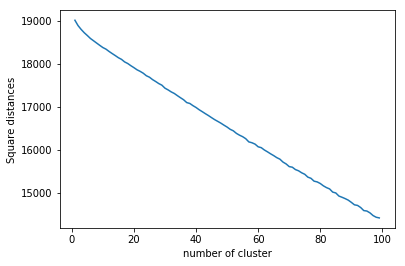

In [74]:
## plot the evolution of the mean of the square distances by the number of cluster
inertias = []
nclust = range(1,100)
for i in tqdm.tqdm(nclust):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(x)
    inertias.append(kmean.inertia_)
    
plt.plot(nclust,inertias)
plt.xlabel('number of cluster')
plt.ylabel('Square distances')


Dictionary Learning on PyRat Games 
--

Generate a MiniBatchDictionaryLearning model of the pyrat dataset. Show the components, the reconstructions and the errors.

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  10 (elapsed time:   0s,  0.0mn)
Iteration  20 (elapsed time:   0s,  0.0mn)
Iteration  30 (elapsed time:   0s,  0.0mn)
Iteration  40 (elapsed time:   0s,  0.0mn)
Iteration  50 (elapsed time:   0s,  0.0mn)
Iteration  60 (elapsed time:   0s,  0.0mn)
Iteration  70 (elapsed time:   0s,  0.0mn)
Iteration  80 (elapsed time:   0s,  0.0mn)
Iteration  90 (elapsed time:   0s,  0.0mn)
Iteration  100 (elapsed time:   0s,  0.0mn)
Iteration  110 (elapsed time:   0s,  0.0mn)
Iteration  120 (elapsed time:   0s,  0.0mn)
Iteration  130 (elapsed time:   0s,  0.0mn)
Iteration  140 (elapsed time:   0s,  0.0mn)
Iteration  150 (elapsed time:   0s,  0.0mn)
Iteration  160 (elapsed time:   0s,  0.0mn)
Iteration  170 (elapsed time:   0s,  0.0mn)
Iteration  180 (elapsed time:   0s,  0.0mn)
Iteration  190 (elapsed time:   0s,  0.0mn)
Iteration  200 (elapsed time:   0s,  0.0mn)
Iteration  210 (elapsed time:   0s,  0.0mn)
Iteration  220 (elapsed time:   0s,  0.0mn

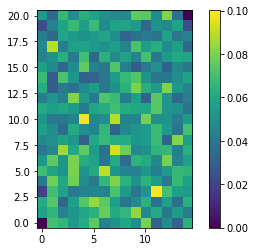

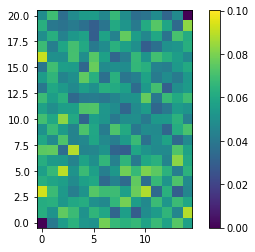

In [81]:
## Instantiate the dictionnary and plot the components of the dictionnary
dictlearn = MiniBatchDictionaryLearning(n_components=2, random_state=0, verbose = 10) # Instantiate a MiniBatchDictionaryLearning
code = dictlearn.fit_transform(x) # Get the code from fit_transform => Get U from the course

components = dictlearn.components_ # Get V from the course

for i,d in enumerate(components):
    plt.imshow(d.reshape((21,15)),vmin=np.min(components),vmax=np.max(components))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

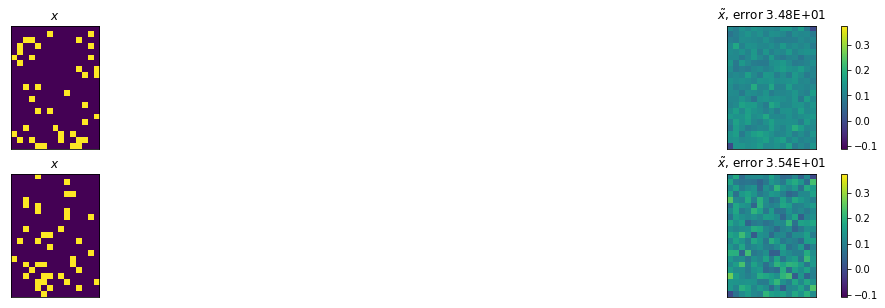

In [85]:
## Show the reconstructions and the erro
whichex = np.random.randint(low=0,high=100,size=1) 
samples = list()
indexes = list()
for i in [-1, 0]:
    index = np.where(y==i)[0][whichex]
    samples.append(x[index])
    indexes.append(index)
X_samp = np.concatenate(samples) # samples = examples
indexes = np.array(indexes) # Indexes of the samples

reconstructions = np.dot(code, components)
plt.figure(figsize=(20,5))
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    plt.subplot(2,2,plot_index*2+1)

    plt.imshow(digit.reshape((21,15)),vmin=x.min(),vmax=x.max())
    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.title('$x$')
        
    plt.subplot(2,2,plot_index*2+2)
    plt.imshow(reconstruction.reshape((21,15)),vmin=reconstructions.min(),vmax=reconstructions.max())
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    error = np.sum((reconstruction-digit)**2)
    plt.title('${\~x}$, error %.2E' % error)

### Now try to analyse the data you have, what are the characteristics that you could find in the games where the python lost? You should now carry on with the analysis on your P2